# Portfolio

This file is meant to be used after the ETL pipeline is ran and reads in queries from SQL Server to simulate an OLAP analysis.

In this section we will create our portfolio with an initial investment of $100,000.

After every 4 month we will analyze the data of our investments by visualizing the metrics.

Based on insights gained from the analysis, we will decide how best to invest the extra $4,000 into our portfolio.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Helper import (
    load_metrics,
    get_portfolio_performance,
    cumulative_graph,
    volatility_graph,
    ma_10_graph,
    ma_100_graph,
    sharpe_graph,
    beta_graph,
)

In [31]:
# Initialize our portfolio
initial_investment = 100000

portfolio = {
    "Nvidia": 20000,
    "Amazon": 20000,
    "JPMorgan": 20000,
    "SPY": 30000,
    "USDCAD": 10000
}

portfolio_performance_list = []
portfolio

{'Nvidia': 20000,
 'Amazon': 20000,
 'JPMorgan': 20000,
 'SPY': 30000,
 'USDCAD': 10000}

## First we will be looking at the first 4 months of data from July 2023 to October 2023

In [32]:
metrics_df = load_metrics("./Data/SQL Outputs/july2023-oct2023_metrics.csv")
market_df = load_metrics("./Data/SQL Outputs/july2023-oct2023_market.csv")

In [33]:
portfolio_performance = get_portfolio_performance(metrics_df, portfolio)
portfolio_performance_list.append(portfolio_performance)
portfolio_performance

,date,total_value,total_return,cumulative_return,num_days,annualized_return,daily_return,volatility,sharpe_ratio
0,2023-07-01,100000.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,0.000000
1,2023-07-02,100132.448305,132.448305,0.001324,2,0.181488,0.001324,0.000000,0.000000
2,2023-07-03,100357.020320,357.020320,0.003570,3,0.348999,0.002243,0.003556,0.597634
3,2023-07-04,100338.361321,338.361321,0.003384,4,0.237147,-0.000186,0.006717,0.276245
4,2023-07-05,100049.134483,49.134483,0.000491,5,0.025067,-0.002883,0.012274,0.102696
...,...,...,...,...,...,...,...,...,...
118,2023-10-27,95812.480335,-4187.519665,-0.041875,119,-0.086605,0.005889,0.053361,-0.016558
119,2023-10-28,95812.480335,-4187.519665,-0.041875,120,-0.085915,0.000000,0.052723,-0.022286
120,2023-10-29,95800.550811,-4199.449189,-0.041994,121,-0.085474,-0.000125,0.052715,-0.022502
121,2023-10-30,97420.222409,-2579.777591,-0.025798,122,-0.052555,0.016907,0.055726,-0.012363


### Looking at the visuals for our different investments over this 4 months period

<Axes: xlabel='Name', ylabel='Cumulative Return'>

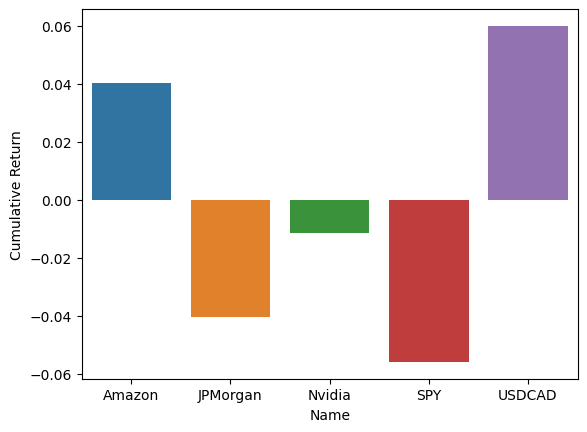

In [34]:
cumulative_graph(metrics_df)

<Axes: xlabel='Day', ylabel='Volatility'>

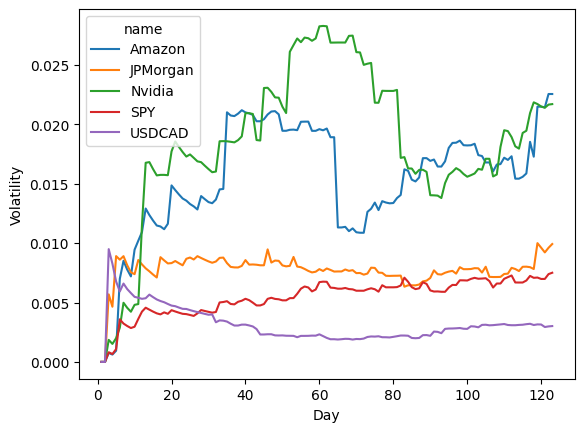

In [35]:
volatility_graph(metrics_df)

<Axes: xlabel='Day', ylabel='10 Day Moving Average'>

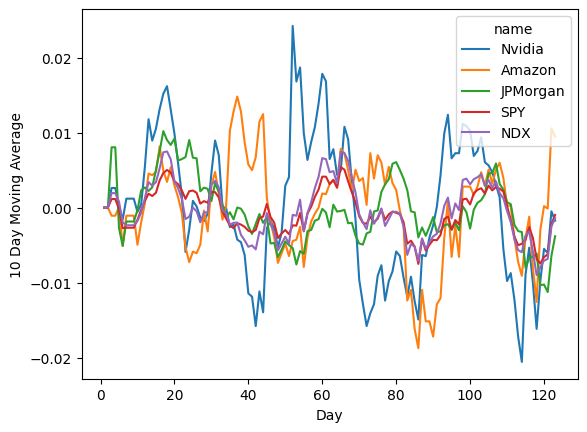

In [36]:
ma_10_graph(market_df)

<Axes: xlabel='Day', ylabel='100 Day Moving Average'>

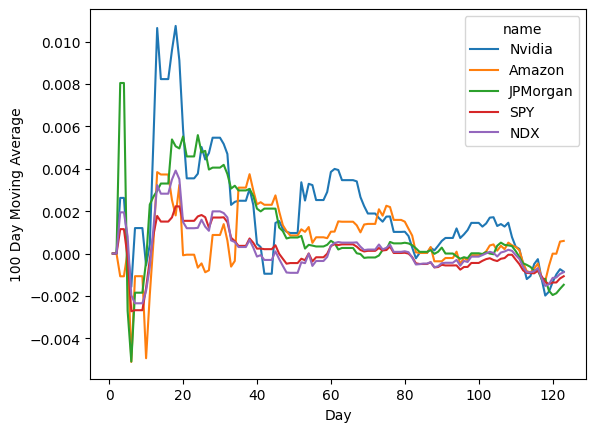

In [37]:
ma_100_graph(market_df)

<Axes: xlabel='Day', ylabel='Sharpe Ratio'>

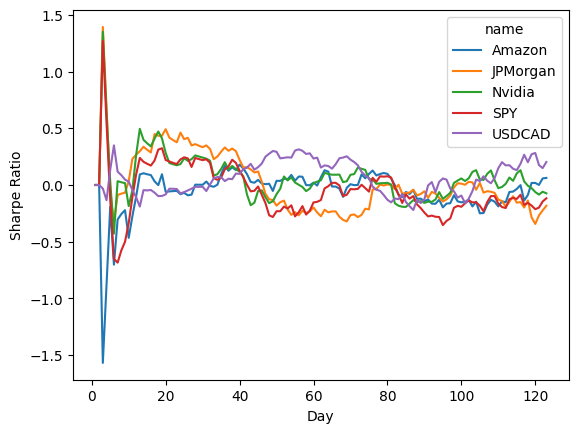

In [38]:
sharpe_graph(metrics_df)

<Axes: xlabel='Name', ylabel='Beta'>

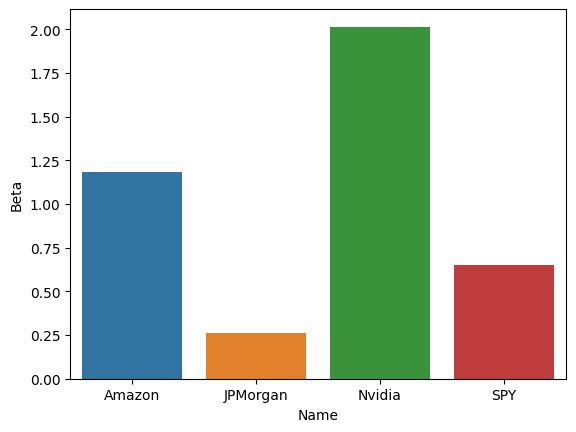

In [39]:
beta_graph(metrics_df)

## Analysis of July 2023 - October 2023

Based on the performance portfolio df we can see that we lost $2262 in the 4 months period.

According to our cumulative returns graph, we can see that most of our lost came from our ETF which tracks the S&P 500 stock market index. 

What this tells us is that the overall market was not doing well in this 4 months period. Looking at the 10 and 100 moving average relative to our market index confirms this as our stocks and ETF follows the same trend.

Our best performing investment was our forex which makes sense at a time like this since the forex won't be affected that badly by the bad market.

Our only other investment that was in the positive was Amazon. However it was also very volatile along with Nvidia.

To be safe I will invest the addition money into both Amazon and Nvidia since they were the best 2 performing stocks.

I will put 3000 into Amazon and 1000 into Nvidia


In [40]:
portfolio["Nvidia"] += 1000
portfolio["Amazon"] += 3000
portfolio

{'Nvidia': np.float64(20280.412273651385),
 'Amazon': np.float64(23418.840135010767),
 'JPMorgan': np.float64(19122.662266226656),
 'SPY': np.float64(28302.65295073095),
 'USDCAD': np.float64(10612.764590725592)}

## Our next set of data will be from November 2023 - Feburary 2024

In [41]:
metrics_df = load_metrics("./Data/SQL Outputs/nov2023-feb2024_metrics.csv")
market_df = load_metrics("./Data/SQL Outputs/nov2023-feb2024_market.csv")
portfolio_performance = get_portfolio_performance(metrics_df, portfolio)
portfolio_performance_list.append(portfolio_performance)
portfolio_performance

,date,total_value,total_return,cumulative_return,num_days,annualized_return,daily_return,volatility,sharpe_ratio
0,2023-11-01,103445.614674,1708.282458,0.000000,1,0.000000,0.000000,0.000000,0.000000
1,2023-11-02,105043.681685,3306.349469,0.015448,2,5.900637,0.015448,0.000000,0.000000
2,2023-11-03,106305.933007,4568.600791,0.027650,3,8.885877,0.012016,0.013292,0.895222
3,2023-11-04,106305.933007,4568.600791,0.027650,4,4.575212,0.000000,0.044431,0.446291
4,2023-11-05,106299.509418,4562.177201,0.027588,5,2.941726,-0.000060,0.044193,0.296187
...,...,...,...,...,...,...,...,...,...
116,2024-02-25,139990.944278,38253.612062,0.353281,117,0.918621,0.000490,0.076381,0.062477
117,2024-02-26,139862.559155,38125.226938,0.352040,118,0.904321,-0.000917,0.076434,0.062130
118,2024-02-27,139557.572425,37820.240209,0.349091,119,0.885305,-0.002181,0.076601,0.060771
119,2024-02-28,139092.446312,37355.114096,0.344595,120,0.862268,-0.003333,0.076525,0.049737


<Axes: xlabel='Name', ylabel='Cumulative Return'>

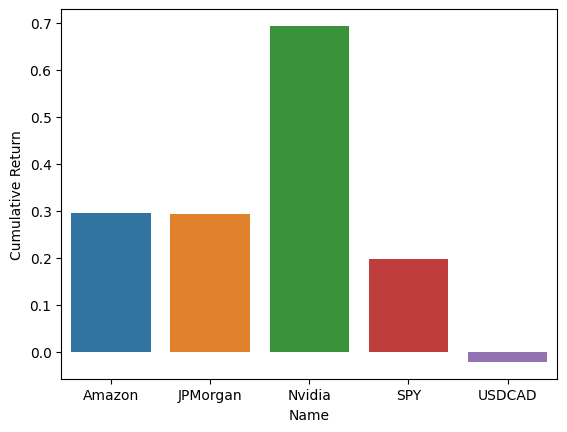

In [42]:
cumulative_graph(metrics_df)

<Axes: xlabel='Day', ylabel='Volatility'>

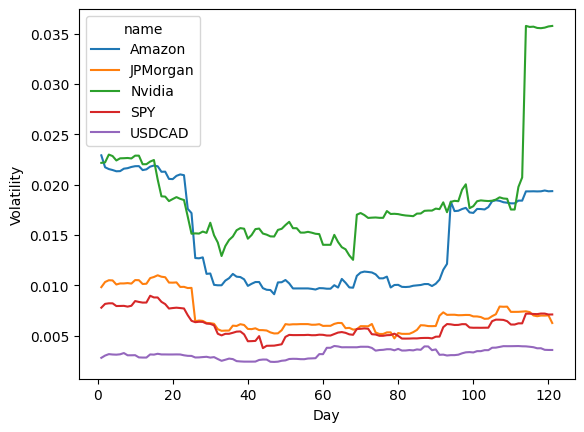

In [43]:
volatility_graph(metrics_df)

<Axes: xlabel='Day', ylabel='10 Day Moving Average'>

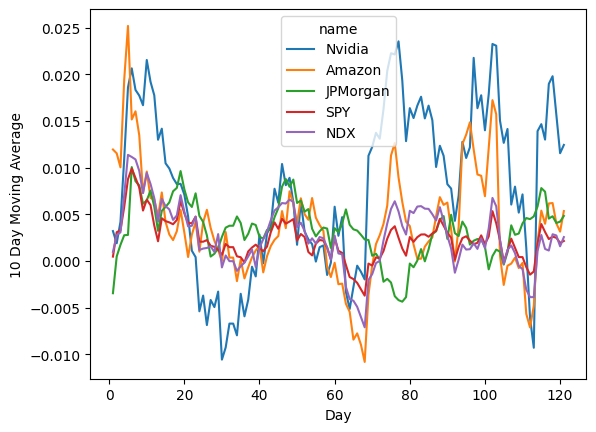

In [44]:
ma_10_graph(market_df)

<Axes: xlabel='Day', ylabel='100 Day Moving Average'>

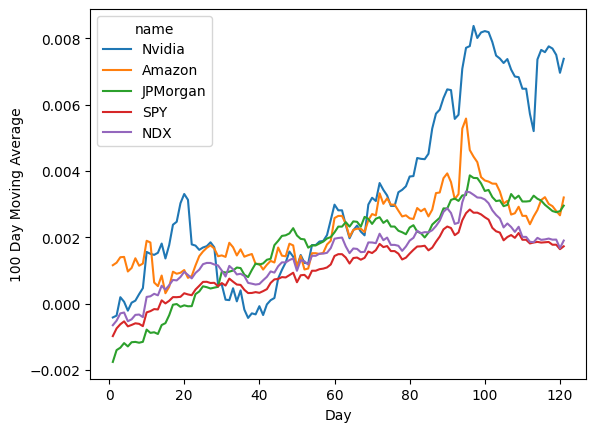

In [45]:
ma_100_graph(market_df)

## Analysis of from Nov 2023 - Feb 2024
Based on the performance portfolio df we can see that we gained \$39,056 in the 4 months period.

Looking at the cumulative returns graphs, we see that a huge majority of our profit came from Nvidia. 

Nvidia ended with about a 70% cumulative return for this time span compared to our other 2 stocks which ended at around 20%-30% cumulative returns.

While this is lower it is still higher than our ETF which shows that our 3 stocks are performing above the market average.

Our worst performer was our forex which ended with a cumulative lost of 2%.

Our most volatile stock was Nvidia by far which makes sense because of the huge sudden increase.

One stock with good performance and a low volatility was JPMorgan. JPMorgan had about the same cumulative return as Amazon but was more stable.



Based on all of this information, I will invest half the additional money into JPMorgan because of the cumulative return and stabliity. The other half will be put into Nvidia just because of how well it is doing with cumulative returns.


In [46]:
portfolio["JPMorgan"] += 2000
portfolio["Nvidia"] += 2000

## Our next set of data will be from March 2024 - June 2024

In [47]:
metrics_df = load_metrics("./Data/SQL Outputs/march2024-june2024_metrics.csv")
market_df = load_metrics("./Data/SQL Outputs/march2024-june2024_market.csv")
portfolio_performance = get_portfolio_performance(metrics_df, portfolio)
portfolio_performance_list.append(portfolio_performance)
portfolio_performance

,date,total_value,total_return,cumulative_return,num_days,annualized_return,daily_return,volatility,sharpe_ratio
0,2024-03-01,146909.476457,2115.263518,0.000000,1,0.000000,0.000000,0.000000,0.000000
1,2024-03-02,146909.476457,2115.263518,0.000000,2,0.000000,0.000000,0.000000,0.000000
2,2024-03-03,146901.294027,2107.081088,-0.000056,3,-0.004668,-0.000056,0.000216,-0.801992
3,2024-03-04,148520.731117,3726.518179,0.010968,4,0.988144,0.011024,0.034949,-0.244960
4,2024-03-05,148234.805763,3440.592825,0.009021,5,0.572458,-0.001925,0.032372,-0.184338
...,...,...,...,...,...,...,...,...,...
117,2024-06-26,176794.256464,32000.043526,0.203423,118,0.485049,0.008130,0.062934,0.049974
118,2024-06-27,176591.943752,31797.730813,0.202046,119,0.476538,-0.001144,0.058863,0.033312
119,2024-06-28,175823.804995,31029.592057,0.196817,120,0.458339,-0.004350,0.059171,0.030652
120,2024-06-29,175823.804995,31029.592057,0.196817,121,0.453799,0.000000,0.056043,0.041621


<Axes: xlabel='Name', ylabel='Cumulative Return'>

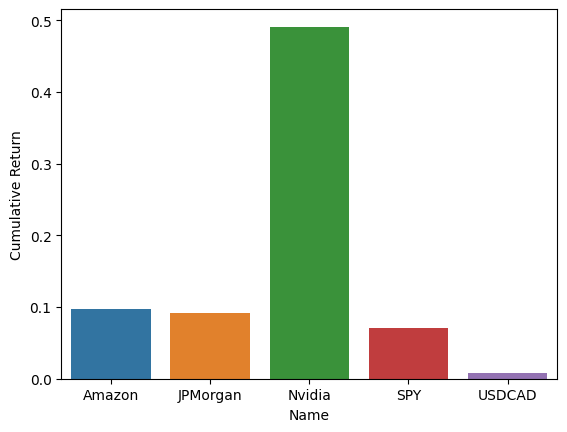

In [48]:
cumulative_graph(metrics_df)

<Axes: xlabel='Day', ylabel='Volatility'>

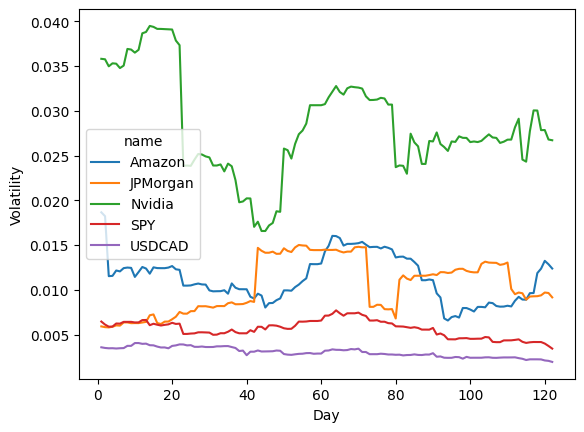

In [49]:
volatility_graph(metrics_df)

<Axes: xlabel='Day', ylabel='10 Day Moving Average'>

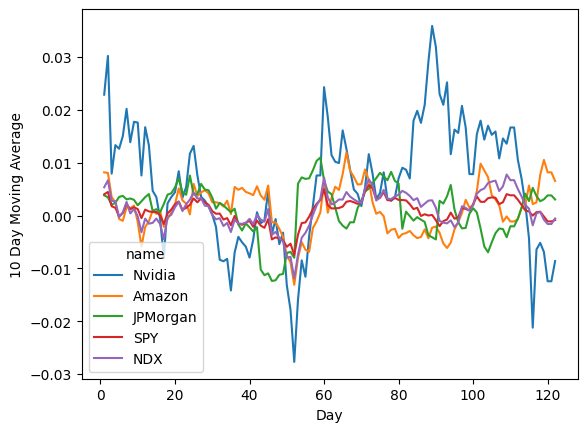

In [50]:
ma_10_graph(market_df)

<Axes: xlabel='Day', ylabel='100 Day Moving Average'>

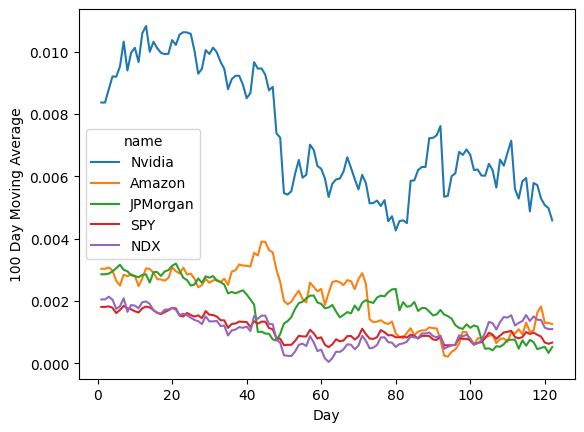

In [51]:
ma_100_graph(market_df)

<Axes: xlabel='Day', ylabel='Sharpe Ratio'>

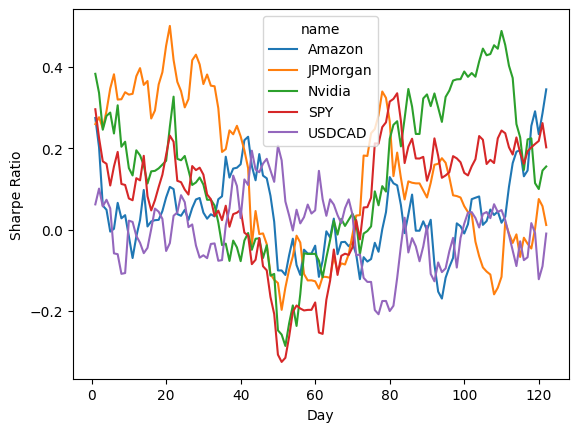

In [52]:
sharpe_graph(metrics_df)

## Analysis of investments from March 2024 - June 2024

Based on the performance portfolio df we can see that we gained $31046 in the 4 months period.

Looking at the cumulative returns graphs, we see that a huge majority of our profit came from Nvidia again.

Nvidia ended with about a 50% cumulative gain.

Both of our other stocks ended with aobut a 10% gain which is slighty over the ETF rate.

This tells us that all of our stocks are is doing better than the market average.

Nvidia continues to be the most volatile investment as expected from the big increase.

Another notable piece of information is while Nvidia may be volatile it's 100 day running average is well above any other investment we have.


## Now for a brief look at how our entire portfolio performed over the year

In [53]:
complete_df = pd.concat(portfolio_performance_list)
complete_df.reset_index(drop=True, inplace=True)
complete_df["total_return"] = complete_df["total_value"] - initial_investment
complete_df["cumulative_return"] = (
    complete_df["total_value"].pct_change().fillna(0).add(1).cumprod().sub(1)
)
complete_df["num_days"] = (
    pd.to_datetime(complete_df["date"]) - pd.to_datetime(complete_df["date"]).min()
).dt.days + 1

def calculate_annualized_return(cumulative_return, num_days):
    return (1 + cumulative_return) ** (252 / num_days) - 1

complete_df["annualized_return"] = complete_df.apply(
    lambda row: calculate_annualized_return(row["cumulative_return"], row["num_days"]),
    axis=1,
)
complete_df["daily_return"] = complete_df["total_value"].pct_change()
complete_df.set_index("date", inplace=True)
complete_df["volatility"] = complete_df["daily_return"].rolling(window="30D").std() * (
    30**0.5
)

risk_free_rate_daily = (1 + 0.03) ** (1 / 252) - 1

complete_df["sharpe_ratio"] = (
    ((complete_df["daily_return"] - risk_free_rate_daily) / complete_df["volatility"])
    .rolling(window="30D")
    .mean()
)
complete_df.reset_index(names="date", inplace=True)
complete_df.fillna(0, inplace=True)
complete_df

,date,total_value,total_return,cumulative_return,num_days,annualized_return,daily_return,volatility,sharpe_ratio
0,2023-07-01,100000.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,0.000000
1,2023-07-02,100132.448305,132.448305,0.001324,2,0.181488,0.001324,0.000000,0.000000
2,2023-07-03,100357.020320,357.020320,0.003570,3,0.348999,0.002243,0.003556,0.597634
3,2023-07-04,100338.361321,338.361321,0.003384,4,0.237147,-0.000186,0.006717,0.276245
4,2023-07-05,100049.134483,49.134483,0.000491,5,0.025067,-0.002883,0.012274,0.102696
...,...,...,...,...,...,...,...,...,...
361,2024-06-26,176794.256464,76794.256464,0.767943,362,0.486862,0.008130,0.062934,0.049974
362,2024-06-27,176591.943752,76591.943752,0.765919,363,0.484058,-0.001144,0.058863,0.033312
363,2024-06-28,175823.804995,75823.804995,0.758238,364,0.477982,-0.004350,0.059171,0.030652
364,2024-06-29,175823.804995,75823.804995,0.758238,365,0.476401,0.000000,0.056043,0.041621


Text(0.5, 1.0, 'Portfolio Total Value')

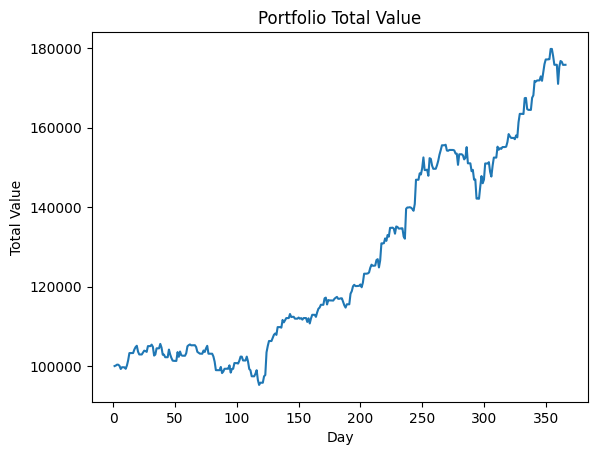

In [54]:
graph = sns.lineplot(
    data=complete_df,
    x="num_days",
    y="total_value",
)
graph.set(xlabel="Day", ylabel="Total Value")
plt.title("Portfolio Total Value")

Text(0.5, 1.0, 'Portfolio Annualized Return')

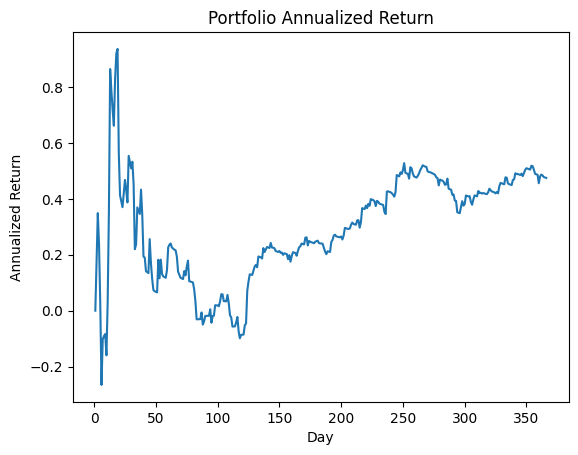

In [55]:
graph = sns.lineplot(
    data=complete_df,
    x="num_days",
    y="annualized_return",
)
graph.set(xlabel="Day", ylabel="Annualized Return")
plt.title("Portfolio Annualized Return")

Text(0.5, 1.0, 'Portfolio Volatility')

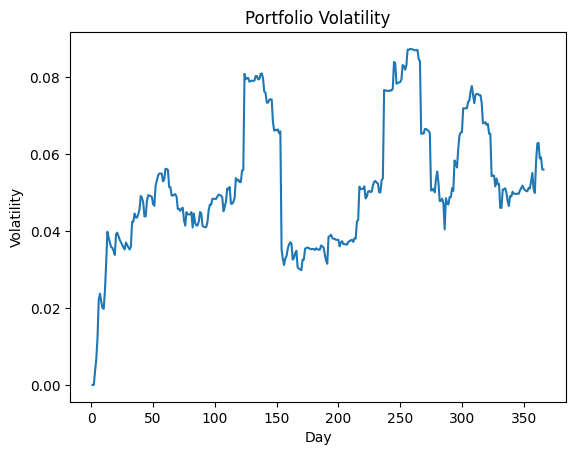

In [56]:
graph = sns.lineplot(
    data=complete_df,
    x="num_days",
    y="volatility",
)
graph.set(xlabel="Day", ylabel="Volatility")
plt.title("Portfolio Volatility")

Text(0.5, 1.0, 'Portfolio Sharpe Ratio')

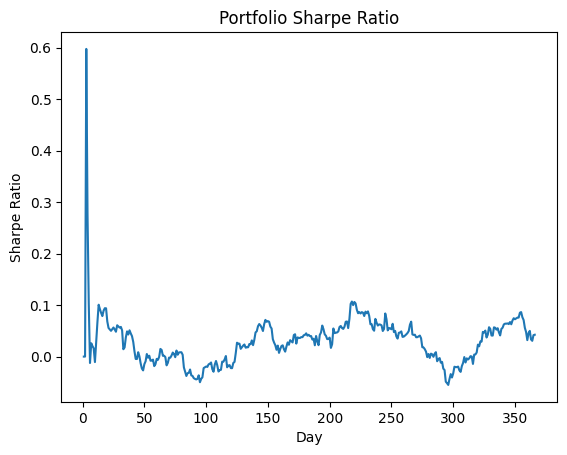

In [57]:
graph = sns.lineplot(
    data=complete_df,
    x="num_days",
    y="sharpe_ratio",
)
graph.set(xlabel="Day", ylabel="Sharpe Ratio")
plt.title("Portfolio Sharpe Ratio")

## Analysis of Portfolio

We can see the growth of our portfolio over the year from our visualizations. 

We start with a total value of \$100,000 on our first investment day which is July 1st 2023.

We can see that our portfolio grew to a value of \$175,840 when it ended on June 30th 2024

This is about a 75% increase from our initial initial investment.

We are also able to see the annualized return, volatility, and sharpe ratio of our portfolio.